In [1]:
from sklearn import metrics
from matplotlib import pyplot
from numpy import loadtxt
import numpy as np
import matplotlib.pyplot as plt 

In [5]:
def AUC(folder, language, r):
    """
    This function:
        - loads anomaly scores for the self-language (English) and inputted anomalous language
        for specified r value
        - computes sensitivity and specificity values
        - plots the corresponding ROC curve
        - computes and returns the AUC corresponding to the curve
    Input: language as one-letter string, r as integer (max contiguous substring of length r)
    Output: ROC curve and AUC value.
    """
    filename1 = folder + "output_e" + str(r) + ".txt"
    filename2 = folder + "output_" + language + str(r) + ".txt"
    arr_self = loadtxt(filename1)
    arr_an = loadtxt(filename2)
    arr_merged = np.append(arr_self, arr_an)
    arr_merged.sort()
    arr_merged_u = np.unique(arr_merged)
    
    sens = [len([a_s for a_s in arr_an if a_s > score])/len(arr_an) for score in arr_merged_u]
    spec = [len([a_s for a_s in arr_self if a_s <= score])/len(arr_self) for score in arr_merged_u]
    spec_inv = [1-s for s in spec]
    
    sens = np.append(np.append(1, sens),0)
    spec_inv = np.append(np.append(1, spec_inv),0)
    
    auc = metrics.auc(sens, np.append(np.append(0,spec),1))
    
    plt.plot(spec_inv, sens)
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.xlabel('1-specificity')
    plt.ylabel('sensitivity')
    t_string = 'ROC for r=' + str(r) + ' with AUC = ' + str(auc)
    plt.title(t_string)
    
    return auc

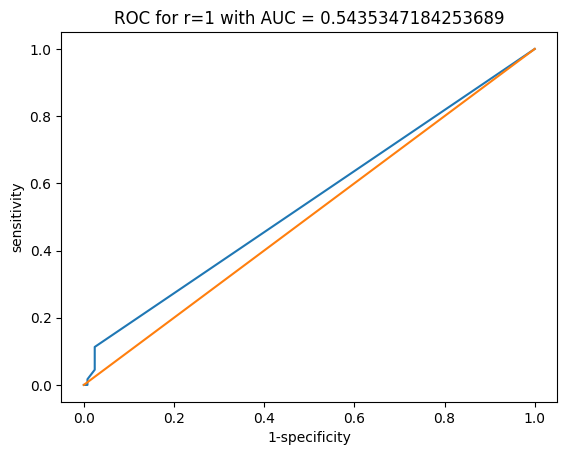

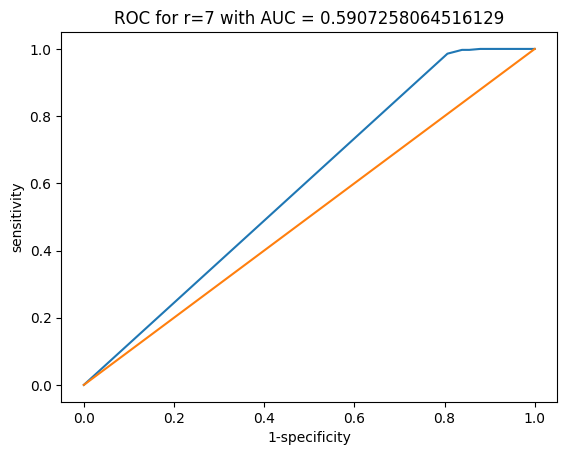

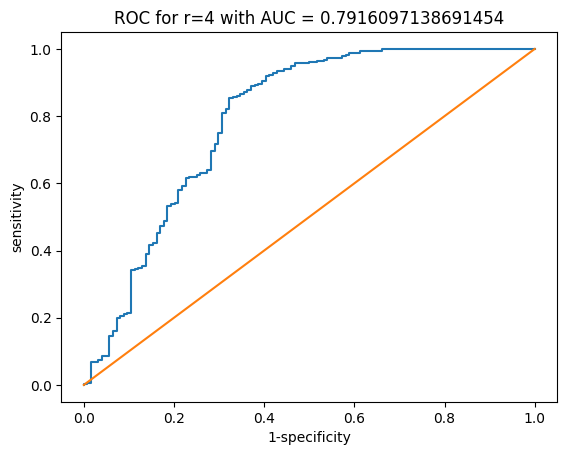

In [6]:
""" TASK 1"""
for r in [1,7,4]:
    plt.figure(r) 
    AUC("./Task1/", 't',r)

# Curves in figure 1 belong to r=1, r=7 and r=4 respectively
# We find the best AUC score for r=3: AUC=0.8311

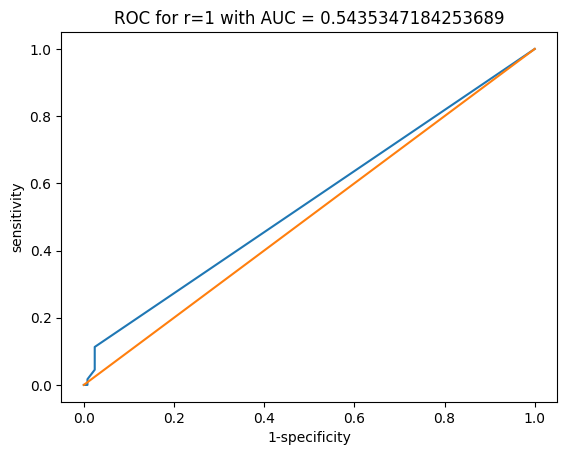

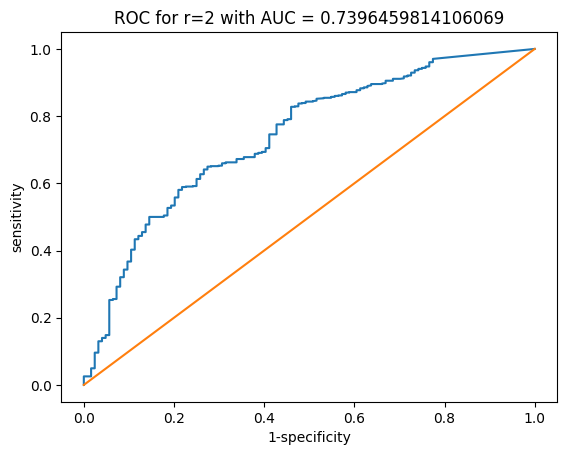

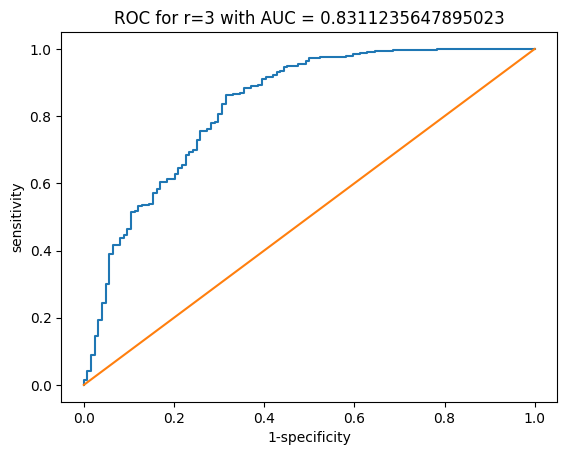

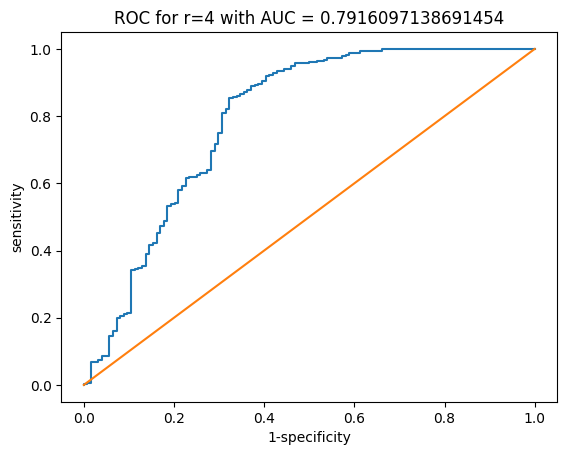

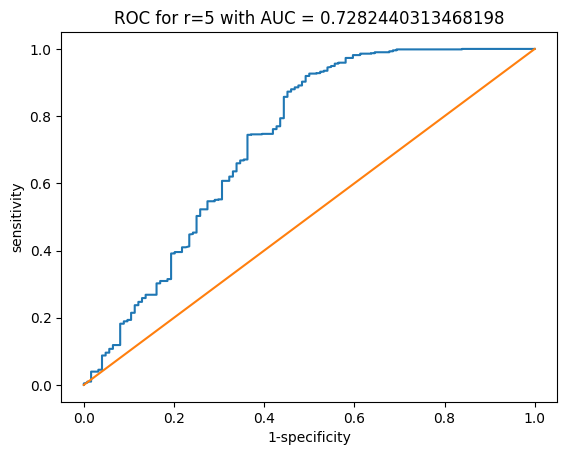

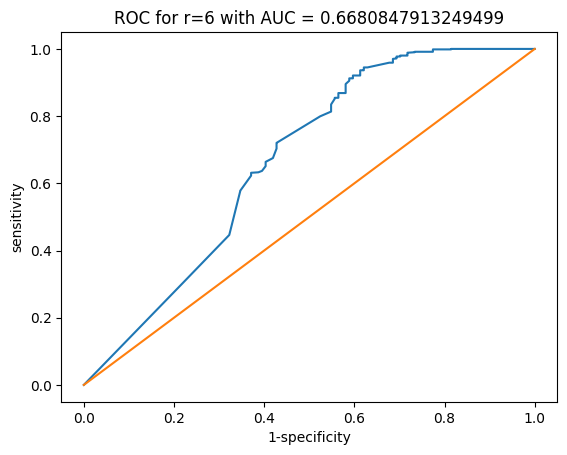

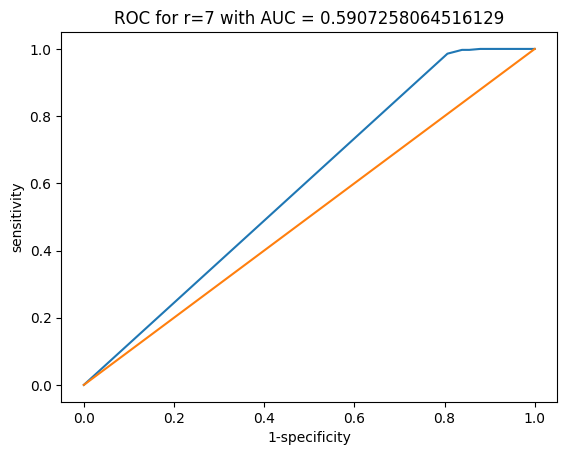

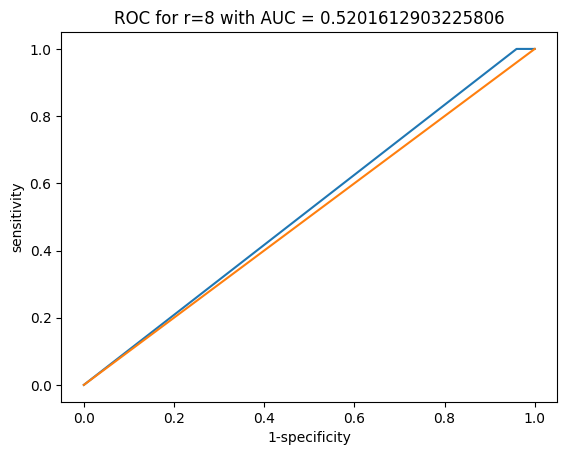

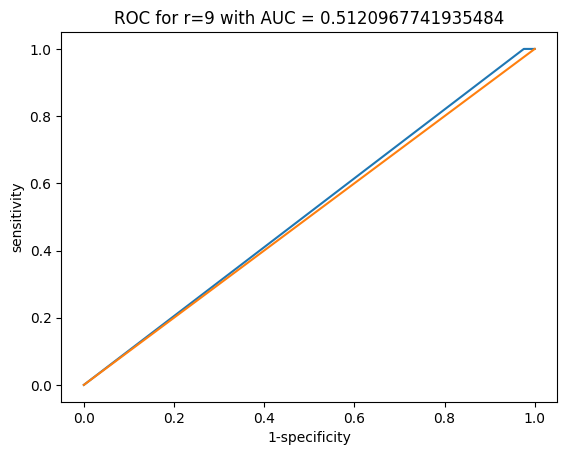

In [79]:
""" TASK 2"""
for r in [1,2,3,4,5,6,7,8,9]:
    plt.figure(r) 
    AUC("./Task1/", 't',r)

# We find the best AUC score for r=3: AUC=0.8311
# Thus forward in this assignment, we will use r=3 

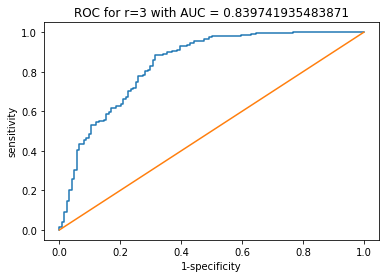

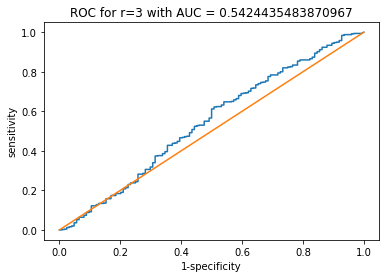

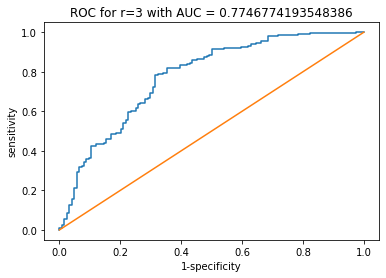

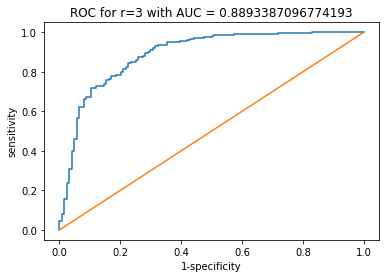

In [5]:
"""TASK 3 """
i=0
for language in ['h','m','p','x']:
    plt.figure(i)
    i+= 1
    AUC("./Task1/", language,r=3)
    
# We find the highest AUC for language Xhosa and the lowest AUC for Middle-English. 
# Middle-English looks the most alike English, thus is hard to distinguish from the self-language,
# resulting in a poor AUC value

In [6]:
"""
NEXT TASK
"""

'\nNEXT TASK\n'

In [9]:
def preprocess_train(file, n):
    """
    Preprocesses train file by finding all substrings of length n for each item in the train set. 
    If an item is smaller than length n, it is padded with '_' until it is of length n.
    Input: filename of the train file and integer n (destined length of strings).
    Output: Numpy array of n-length chunked test strings.
    """
    def find_substrings(line, n):
        return np.array([line[i: j] for i in range(len(line)) for j in range(i + 1, len(line) + 1) if len(line[i:j]) == n])
    
    train = loadtxt(file, dtype=str)
    train_processed = np.array([])
    for i in range(len(train)):
        if len(train[i])<n:
            line = train[i] + '_'*(n-len(train[i]))
            train_processed = np.append(train_processed, line).flatten()
        else:
            train_processed = np.append(train_processed, find_substrings(train[i], n)).flatten()
    return np.unique(train_processed)

In [10]:
def preprocess_test(file, labelfile, n):
    """
    Preprocesses test and labels file by finding all substrings of length n for each item in the train set. 
    If an item is smaller than length n, it is padded with '_' until it is of length n.
    Input: filename of the train file, filename of labels file and integer n (destined length of strings).
    Output: Three same length Numpy arrays: 
        - All n-length chunked test strings.
        - Labels per chunk
        - Corresponding initial string/item index
    """
    def find_substrings(line, n):
        return np.array([line[i: j] for i in range(len(line)) for j in range(i + 1, len(line) + 1) if len(line[i:j]) == n])
    
    test = loadtxt(file, dtype=str)
    labels = loadtxt(labelfile, dtype=str)
    test_processed = np.array([])
    labels_processed = np.array([])
    chunks = np.array([])
    for i in range(len(test)):
        label = labels[i]
        if len(test[i])<n:
            line = test[i] + '_'*(n-len(test[i]))
            test_processed = np.append(test_processed, line).flatten()
            labels_processed = np.append(labels_processed, label)
            chunks = np.append(chunks, i)
        else:
            line = test[i]
            substrings = find_substrings(test[i], n)
            test_processed = np.append(test_processed, substrings).flatten()
            labels_processed = np.append(labels_processed, [label]*len(substrings))
            chunks = np.append(chunks, [i]*len(substrings))
    return test_processed, labels_processed, chunks

In [12]:
test = loadtxt('./syscalls/snd-cert/snd-cert.1.test', dtype=str)
train = loadtxt('./syscalls/snd-cert/snd-cert.train', dtype=str)
labels = loadtxt('./syscalls/snd-cert/snd-cert.1.labels', dtype=str)

In [13]:
anom = [train[i] for i in range(len(test)) if labels[i]=='1']
labels

array(['0', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '0', '0',
       '1', '1', '1', '1', '1', '0', '1', '0', '0', '1', '1', '0', '0',
       '1', '1', '0', '0', '1', '0', '0', '0', '1', '0', '1', '1', '0',
       '1', '0', '0', '0', '1', '0', '1', '0', '0', '0', '0', '1', '1',
       '1', '0', '1', '1', '1', '0', '0', '1', '0', '1', '1', '0', '0',
       '0', '1', '1', '0', '1', '1', '1', '1', '0', '0', '1', '0', '0',
       '0', '1', '1', '0', '0', '1', '1', '1', '0', '0', '0', '1', '0',
       '1', '0', '1', '1', '0', '0', '1', '1', '1'], dtype='<U1')

(array([ 4.,  2.,  1.,  1., 47.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 18.]),
 array([   8.  ,   27.84,   47.68,   67.52,   87.36,  107.2 ,  127.04,
         146.88,  166.72,  186.56,  206.4 ,  226.24,  246.08,  265.92,
         285.76,  305.6 ,  325.44,  345.28,  365.12,  384.96,  404.8 ,
         424.64,  444.48,  464.32,  484.16,  504.  ,  523.84,  543.68,
         563.52,  583.36,  603.2 ,  623.04,  642.88,  662.72,  682.56,
         702.4 ,  722.24,  742.08,  761.92,  781.76,  801.6 ,  821.44,
         841.28,  861.12,  880.96,  900.8 ,  920.64,  940.48,  960.32,
         980.16, 1000.  ]),
 <BarContainer object of 50 artists>)

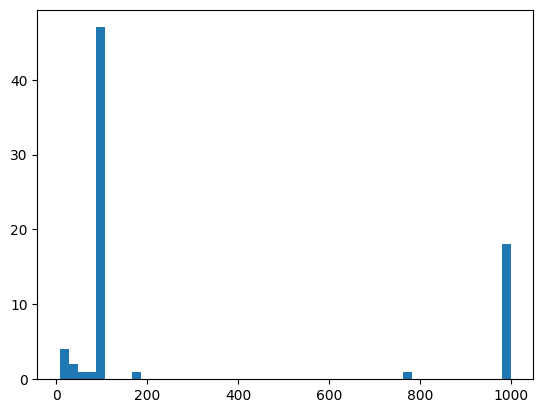

In [14]:
#plt.hist([len(i) for i in anom], bins=50)
plt.hist([len(i) for i in test if i not in anom], bins=50)

(array([ 6.,  2.,  1.,  1., 47.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 40.]),
 array([   7.  ,   26.86,   46.72,   66.58,   86.44,  106.3 ,  126.16,
         146.02,  165.88,  185.74,  205.6 ,  225.46,  245.32,  265.18,
         285.04,  304.9 ,  324.76,  344.62,  364.48,  384.34,  404.2 ,
         424.06,  443.92,  463.78,  483.64,  503.5 ,  523.36,  543.22,
         563.08,  582.94,  602.8 ,  622.66,  642.52,  662.38,  682.24,
         702.1 ,  721.96,  741.82,  761.68,  781.54,  801.4 ,  821.26,
         841.12,  860.98,  880.84,  900.7 ,  920.56,  940.42,  960.28,
         980.14, 1000.  ]),
 <BarContainer object of 50 artists>)

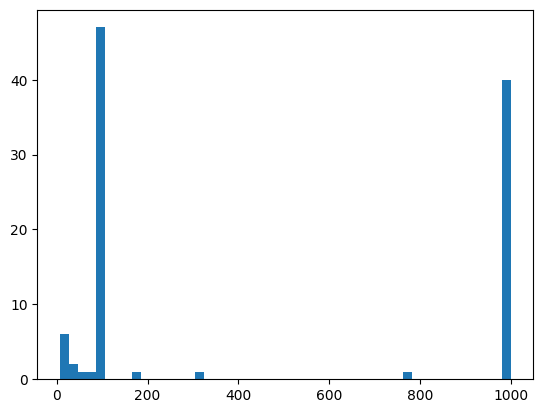

In [15]:
plt.hist([len(i) for i in test], bins=50)

In [16]:
as_strided = np.lib.stride_tricks.as_strided
a = [1,2,3,4,5,6,7,8,9,10]
as_strided(a, (10,4), 4)

TypeError: 'int' object is not iterable

In [60]:
N = 3

# For first data-set
train_p = preprocess_train('./syscalls/snd-cert/snd-cert.train', 100)
np.savetxt(f'./N{N}/train_c.txt', train_p, fmt="%s")

In [61]:
test_p1, labels_p1, chunks1 = preprocess_test('./syscalls/snd-cert/snd-cert.1.test','./syscalls/snd-cert/snd-cert.1.labels', N)
test_p2, labels_p2, chunks2 = preprocess_test('./syscalls/snd-cert/snd-cert.2.test','./syscalls/snd-cert/snd-cert.2.labels', N)
test_p3, labels_p3, chunks3 = preprocess_test('./syscalls/snd-cert/snd-cert.3.test','./syscalls/snd-cert/snd-cert.3.labels', N)

In [62]:
np.savetxt(f'./N{N}/test_c1.txt', test_p1, fmt="%s")
np.savetxt(f'./N{N}/labels_c1.txt', labels_p1, fmt="%s")
np.savetxt(f'./N{N}/chunksc1.txt', chunks1, fmt="%s")
np.savetxt(f'./N{N}/test_c2.txt', test_p2, fmt="%s")
np.savetxt(f'./N{N}/labels_c2.txt', labels_p2, fmt="%s")
np.savetxt(f'./N{N}/chunksc2.txt', chunks2, fmt="%s")
np.savetxt(f'./N{N}/test_c3.txt', test_p3, fmt="%s")
np.savetxt(f'./N{N}/labels_c3.txt', labels_p3, fmt="%s")
np.savetxt(f'./N{N}/chunksc3.txt', chunks3, fmt="%s")

In [20]:
# For second data-set
train_u = preprocess_train('./syscalls/snd-unm/snd-unm.train', 10)
np.savetxt('train_u.txt', train_p, fmt="%s")

In [21]:
test_u1, labels_u1, chunksu1 = preprocess_test('./syscalls/snd-unm/snd-unm.1.test','./syscalls/snd-unm/snd-unm.1.labels', 10)
test_u2, labels_u2, chunksu2= preprocess_test('./syscalls/snd-unm/snd-unm.2.test','./syscalls/snd-unm/snd-unm.2.labels', 10)
test_u3, labels_u3, chunksu3 = preprocess_test('./syscalls/snd-unm/snd-unm.3.test','./syscalls/snd-unm/snd-unm.3.labels', 10)

In [22]:
np.savetxt('test_u1.txt', test_u1, fmt="%s")
np.savetxt('labels_u1.txt', labels_u1, fmt="%s")
np.savetxt('chunksu1.txt', chunksu1, fmt="%s")
np.savetxt('test_u2.txt', test_u2, fmt="%s")
np.savetxt('labels_u2.txt', labels_u2, fmt="%s")
np.savetxt('chunksu2.txt', chunksu2, fmt="%s")
np.savetxt('test_u3.txt', test_u3, fmt="%s")
np.savetxt('labels_u3.txt', labels_u3, fmt="%s")
np.savetxt('chunksu3.txt', chunksu3, fmt="%s")

In [68]:
def AUC_2(scorefile, labelfile, chunkfile):
    """

    """
    #filename1 = "test_output_p" + str(r) + ".txt"
    #filename2 = "output_" + language + str(r) + ".txt"
    #arr_self = loadtxt(filename1)
    #arr_an = loadtxt(filename2, delimiter="'\n'")
    #arr_merged = np.append(arr_self, arr_an)
    #arr_self.sort()
    #arr_self_u = np.unique(arr_merged)
    
    scores = loadtxt(scorefile)
    labels = loadtxt(labelfile)
    chunks = loadtxt(chunkfile)
    print(len(scores))
    print(len(chunks))
    scores_label_0 = []
    scores_label_1 = []
    prev_chunk = 0
    chunk_scores = []
    for i in range(len(scores)):
        chunk = chunks[i]
        if chunk == prev_chunk:
            chunk_scores.append(scores[i])
        else:   
            prev_chunk = chunks[i]
            if (labels[i-1] == 0):
                scores_label_0.append(np.mean(chunk_scores))
            else:
                scores_label_1.append(np.mean(chunk_scores))
            chunk_scores = [scores[i]]
    
    arr_merged = np.append(scores_label_0, scores_label_1)
    arr_merged.sort()
    arr_merged_u = np.unique(arr_merged)
    
    sens = [len([a_s for a_s in scores_label_0 if a_s > score])/len(scores_label_0) for score in arr_merged_u]
    spec = [len([a_s for a_s in scores_label_1 if a_s <= score])/len(scores_label_1) for score in arr_merged_u]
    spec_inv = [1-s for s in spec]
    
    sens = np.append(np.append(1, sens),0)
    spec_inv = np.append(np.append(1, spec_inv),0)
    
    auc = metrics.auc(sens, np.append(np.append(0,spec),1))
    
    plt.plot(spec_inv, sens)
    plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
    plt.xlabel('1-specificity')
    plt.ylabel('sensitivity')
    t_string = 'ROC for r=' + str(r) + ' with AUC = ' + str(auc)
    plt.title(t_string)
    
    return auc

45321
428951
865680


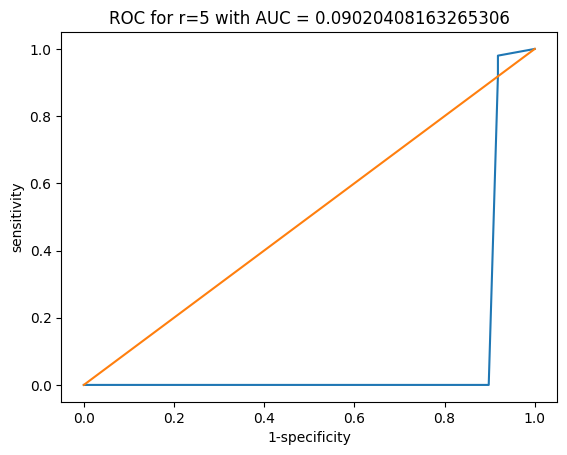

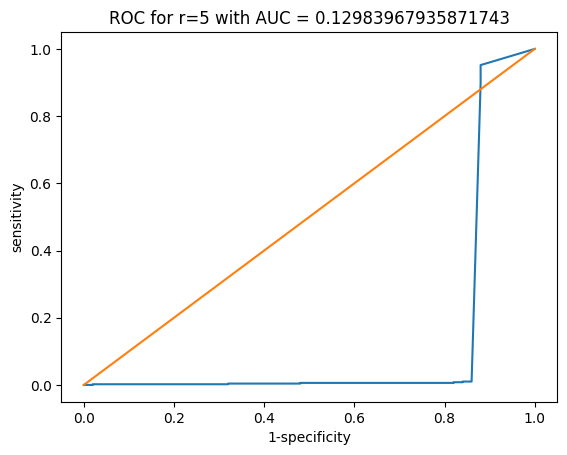

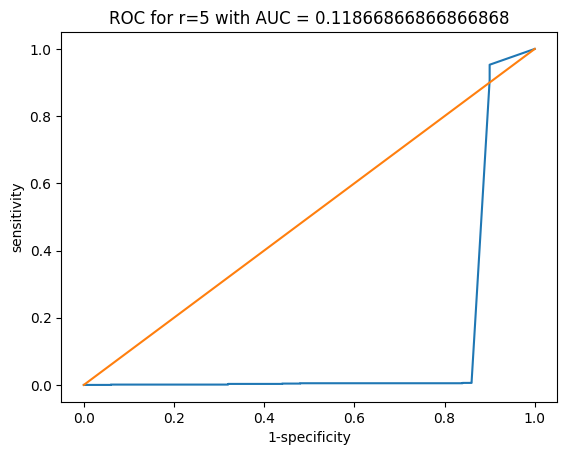

In [55]:
N = 10
data_set = 'p'

for n in [1,2,3]:
    plt.figure(n)
    AUC_2(f'./N{N}/test_output_{data_set}{n}.txt', f'./N{N}/labels_{data_set}{n}.txt', f'./N{N}/chunks{data_set}{n}.txt')

1
46008
46008
2
432722
432722
3
29012
872891


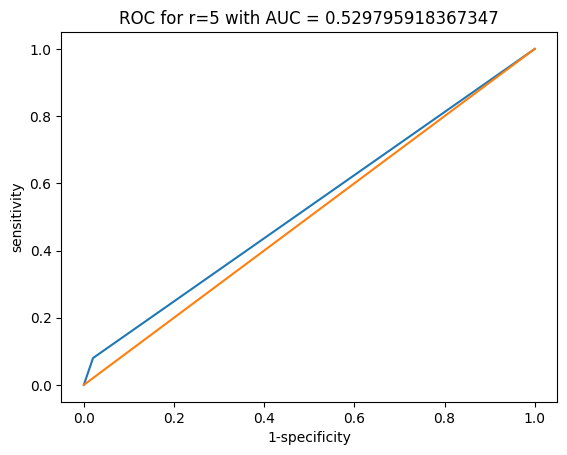

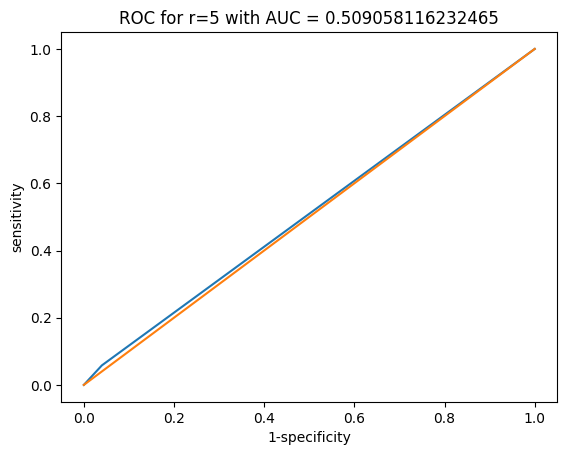

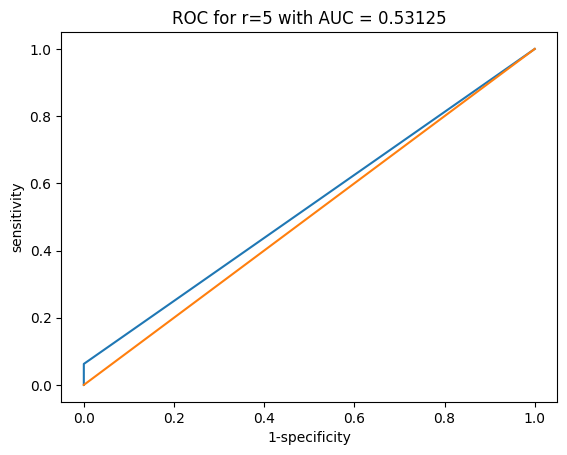

In [77]:
"Results for r=3"
N = 3
data_set = 'c'

for n in [1,2,3]:
    plt.figure(n)
    print(n)
    AUC_2(f'./N{N}/test_output_{data_set}{n}.txt', f'./N{N}/labels_{data_set}{n}.txt', f'./N{N}/chunks{data_set}{n}.txt')

1
46008
46008
2
432722
432722
3
872891
872891


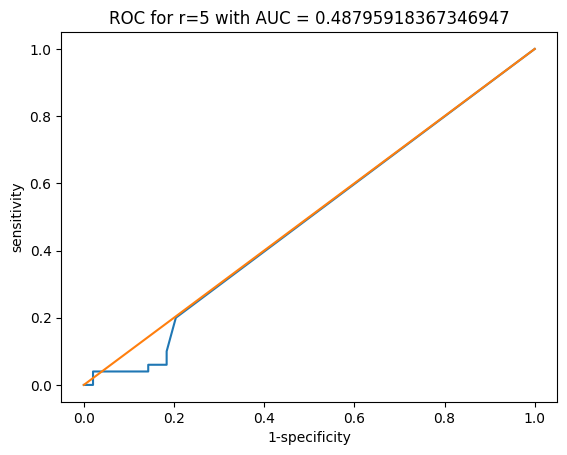

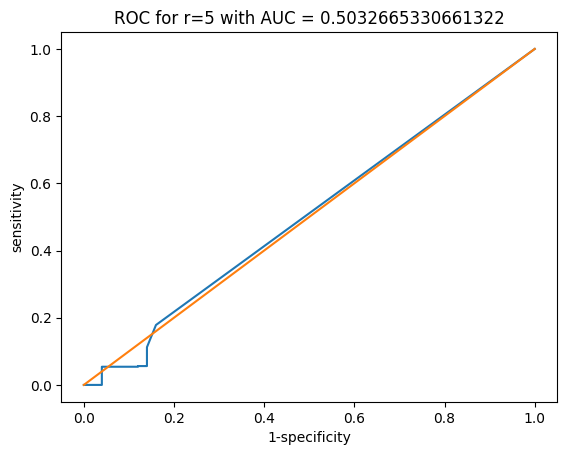

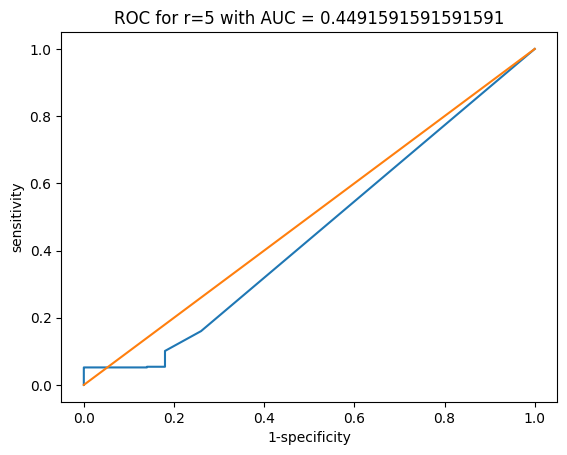

In [75]:
"Results for r=2"
N = 3
data_set = 'c'

for n in [1,2,3]:
    plt.figure(n)
    print(n)
    AUC_2(f'./N{N}/test_output_{data_set}{n}.txt', f'./N{N}/labels_{data_set}{n}.txt', f'./N{N}/chunks{data_set}{n}.txt')